In [68]:
import pandas as pd
from ggplot import *

In [3]:
df=pd.read_csv('train.csv')

In [4]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [5]:
df.shape

(913000, 4)

In [6]:
df.count()

date     913000
store    913000
item     913000
sales    913000
dtype: int64

In [7]:
df.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df['year'],df['month'],df['day']=df.date.dt.year, df.date.dt.month, df.date.dt.day

In [10]:
df.head()

,date,store,item,sales,year,month,day
0,2013-01-01,1,1,13,2013,1,1
1,2013-01-02,1,1,11,2013,1,2
2,2013-01-03,1,1,14,2013,1,3
3,2013-01-04,1,1,13,2013,1,4
4,2013-01-05,1,1,10,2013,1,5


In [24]:
df.describe()

,store,item,sales,year,month,day
count,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287,2015.000548,6.523549,15.727820
std,2.872283,14.430878,28.801144,1.414021,3.448535,8.799329
min,1.000000,1.000000,0.000000,2013.000000,1.000000,1.000000
25%,3.000000,13.000000,30.000000,2014.000000,4.000000,8.000000
50%,5.500000,25.500000,47.000000,2015.000000,7.000000,16.000000
75%,8.000000,38.000000,70.000000,2016.000000,10.000000,23.000000
max,10.000000,50.000000,231.000000,2017.000000,12.000000,31.000000


In [36]:
df['year_month']=df['year'].astype(str)+df['month'].astype(str)

In [38]:
monthly_df = df.groupby([df.date.dt.year, df.date.dt.month])['sales'].mean()
monthly_df.index = monthly_df.index.set_names(['year', 'month'])
monthly_df = monthly_df.reset_index()

In [50]:
x_axis = []
for y in range(13, 18):
    for m in range(1,13):
        x_axis.append("{}/{}".format(m,y))

In [54]:
monthly_df['axis']=x_axis

In [56]:
monthly_df.head()

,year,month,sales,axis
0,2013,1,29.348645,1/13
1,2013,2,32.815500,2/13
2,2013,3,39.831097,3/13
3,2013,4,45.484933,4/13
4,2013,5,49.241419,5/13


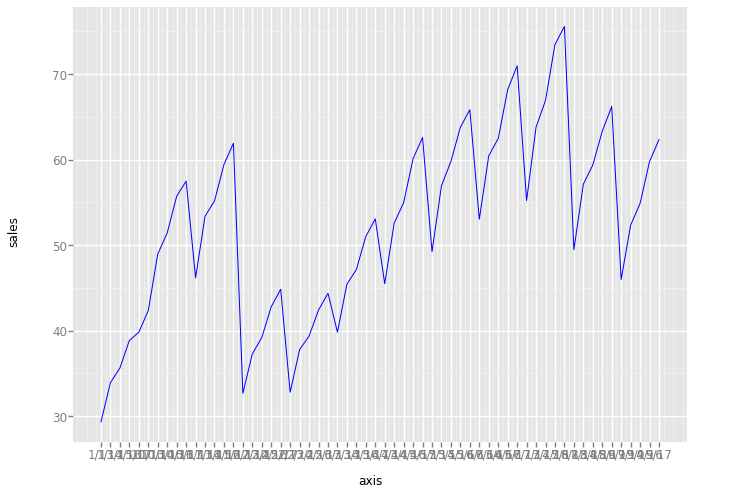

<ggplot: (-9223372024597530536)>

In [61]:
ggplot(monthly_df,aes(x='axis') ) +\
    geom_line(aes(y='sales'), color='blue')

In [70]:
df.groupby("year",as_index=False)['sales'].mean()

,year,sales
0,2013,43.513660
1,2014,50.057436
2,2015,52.256915
3,2016,56.596503
4,2017,58.815014


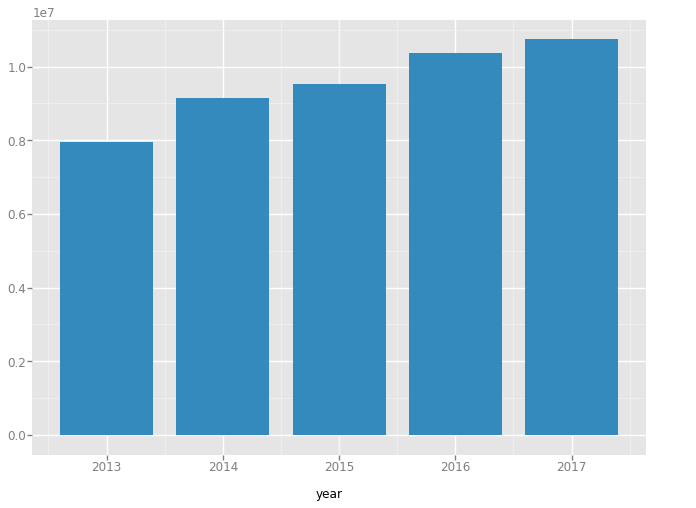

<ggplot: (-9223372024594858503)>

In [71]:
ggplot(df.groupby("year",as_index=False)['sales'].sum(),aes(x='year',weight='sales') )+geom_bar()

In [94]:
monthly_store_df = df.groupby([df.store,df.year, df.month])['sales'].mean()
monthly_store_df.index = monthly_store_df.index.set_names(['store','year', 'month'])
monthly_store_df = monthly_store_df.reset_index()

In [95]:
monthly_store_df.head()

,store,year,month,sales
0,1,2013,1,26.501290
1,1,2013,2,29.504286
2,1,2013,3,36.017419
3,1,2013,4,41.015333
4,1,2013,5,44.691613


In [96]:
x_axis = []
for k in range(1,11):
    for y in range(13, 18):
        for m in range(1,13):
            x_axis.append("{}/{}".format(m,y))

In [97]:
monthly_store_df['axis']=x_axis

In [98]:
monthly_store_df.head()

,store,year,month,sales,axis
0,1,2013,1,26.501290,1/13
1,1,2013,2,29.504286,2/13
2,1,2013,3,36.017419,3/13
3,1,2013,4,41.015333,4/13
4,1,2013,5,44.691613,5/13


In [118]:
monthly_store_df.store=monthly_store_df.store.astype(object)

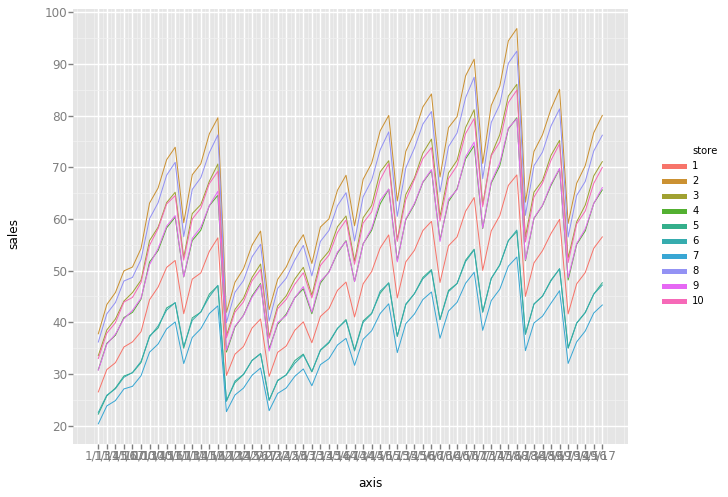

<ggplot: (-9223372024584362124)>

In [119]:
ggplot(monthly_store_df,aes(x='axis',y='sales',group='store',color='store') ) +\
    geom_line()

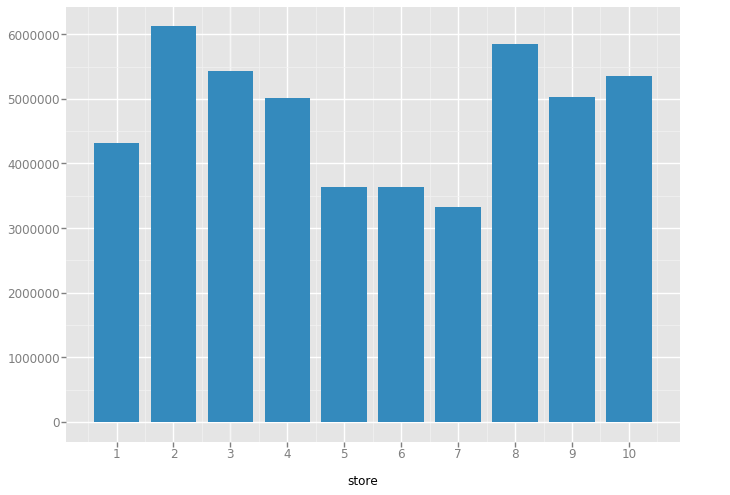

<ggplot: (12270420649)>

In [120]:
ggplot(df.groupby("store",as_index=False)['sales'].sum(),aes(x='store',weight='sales') )+geom_bar()